Midtern - Image Processing

Nguyen Van Truong - 22022571

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
plt.rcParams['figure.figsize'] = [10, 8]

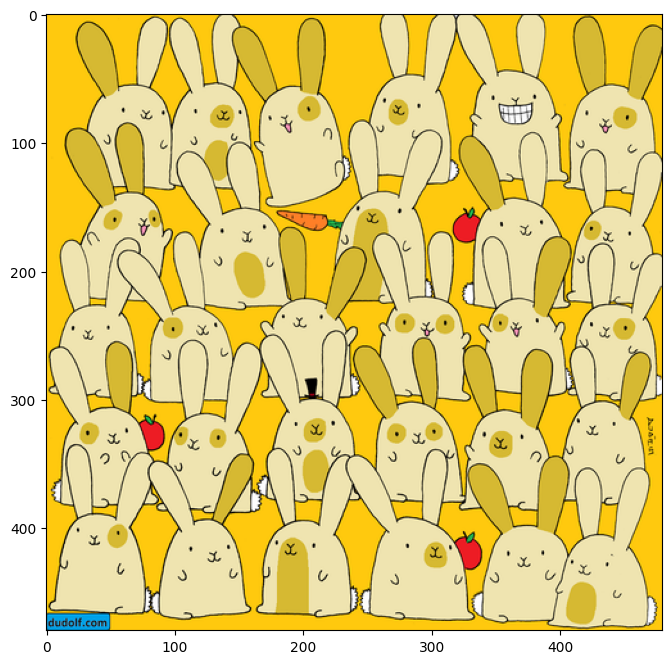

In [19]:
image = cv2.imread('Counting/rabbit2.png')
plt.imshow(image[:, :, ::-1])

In [20]:
def draw_square(image, points):
    image_with_square = image.copy()

    (x1, y1), (x2, y2) = points

    cv2.rectangle(image_with_square, (x1, y1), (x2, y2), (0, 0, 255), 2)

    return image_with_square

def extract_image(image, points):
    (x1, y1), (x2, y2) = points
    roi = image[y1:y2, x1:x2]
    return roi

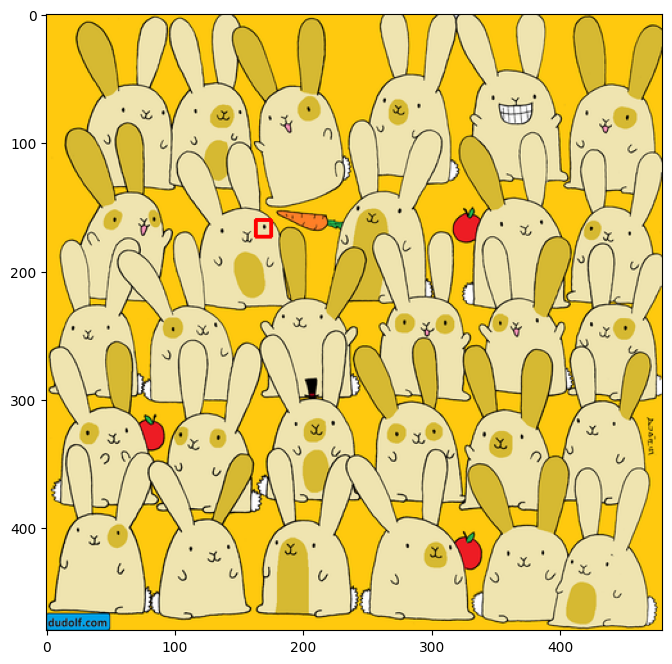

In [25]:
points = [(163, 160), (175, 173)]
image_with_square = draw_square(image, points)
plt.imshow(image_with_square[:, :, ::-1])

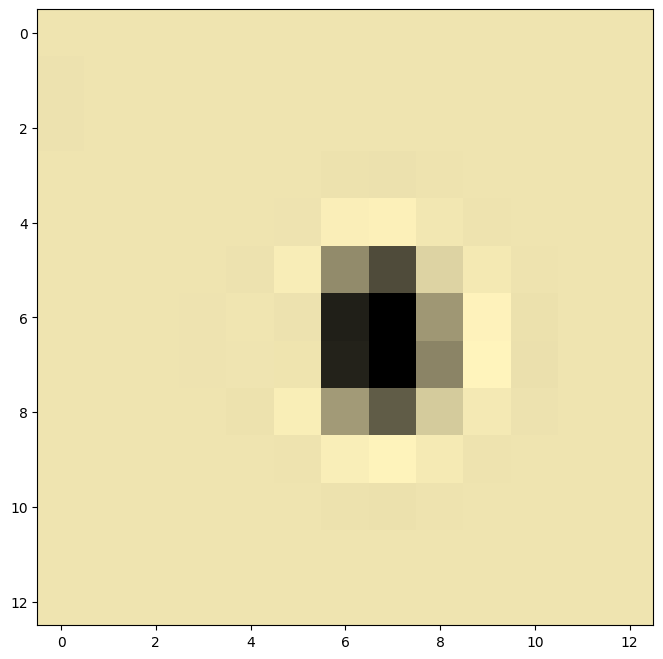

In [26]:
points = [(130, 162), (143, 175)]
split_img = extract_image(image, points)
plt.imshow(split_img[:, :, ::-1])

In [27]:
def iou(u, v, shape):
    height, width = shape
    if np.abs((u[0] - v[0])) > width or np.abs((u[1] - v[1])) > height:
        return 0
    else:
        i_width = width - np.abs((u[0] - v[0]))
        i_height = height - np.abs((u[1] - v[1]))
        return (i_width * i_height) / ((width * height) * 2 - (i_width * i_height))
def are_boxes_near(box1, box2, vicinity_threshold):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    center1_x = x1 + w1 / 2
    center1_y = y1 + h1 / 2
    center2_x = x2 + w2 / 2
    center2_y = y2 + h2 / 2

    distance = np.sqrt((center1_x - center2_x) ** 2 + (center1_y - center2_y) ** 2)

    return distance <= vicinity_threshold